<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Clase5/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 3: Clustering con K-Means

En esta clase, profundizaremos en el **Clustering**, una de las aplicaciones más intuitivas del aprendizaje no supervisado, y en particular, exploraremos el algoritmo **K-Means**, que es uno de los métodos de agrupamiento más populares y eficientes.

### Introducción al Clustering y K-Means

El **Clustering** busca dividir un conjunto de datos en grupos (clústeres) de manera que los puntos dentro del mismo clúster sean muy similares entre sí, y al mismo tiempo, muy diferentes de los puntos en otros clústeres. El objetivo es descubrir la estructura natural o las agrupaciones inherentes en los datos.

El algoritmo **K-Means** es un método de clustering particional, lo que significa que divide el dataset en un número predefinido de clústeres.

### ¿Cómo funciona el Algoritmo K-Means?

K-Means es un algoritmo iterativo que busca minimizar la inercia (la suma de los cuadrados de las distancias de cada punto a su centroide asignado). Aquí están los pasos principales:

1.  **Definir K (Número de Clústeres):** Primero, debemos decidir cuántos clústeres (`K`) queremos que el algoritmo encuentre en nuestros datos. Esta es una decisión crucial y a menudo el mayor desafío de K-Means.

2.  **Inicialización de Centroides:** El algoritmo selecciona aleatoriamente `K` puntos del conjunto de datos para que sirvan como los centros iniciales de los clústeres (llamados "centroides"). La calidad de esta inicialización puede afectar el resultado final. Scikit-learn por defecto usa `k-means++`, un método de inicialización más inteligente que selecciona los centroides de forma que estén bien dispersos, lo que generalmente conduce a mejores resultados.

3.  **Paso de Asignación (E-step - Expectation):** Para cada punto de datos en el conjunto, el algoritmo calcula su distancia a cada uno de los `K` centroides. Luego, asigna cada punto al clúster cuyo centroide es el más cercano (generalmente utilizando la distancia euclidiana).

4.  **Paso de Actualización (M-step - Maximization):** Una vez que todos los puntos han sido asignados, los centroides de cada clúster se recalculan. El nuevo centroide de un clúster es simplemente la media (promedio) de todas las coordenadas de los puntos asignados a ese clúster.

5.  **Iteración y Convergencia:** Los pasos de asignación y actualización se repiten iterativamente. El algoritmo continúa hasta que:
    * Los centroides ya no se mueven significativamente entre iteraciones (lo que indica que los clústeres se han estabilizado).
    * Se alcanza un número máximo de iteraciones predefinido.

Este proceso iterativo garantiza que los puntos estén en los clústeres más adecuados y que los centroides sean el centro "óptimo" de esos clústeres.

### Demostración con Datos Sintéticos

Comenzaremos visualizando el funcionamiento de K-Means en un dataset sintético donde los grupos son naturalmente distinguibles.

#### Pasos en el código:
1.  **Generación de Datos:** Creamos un dataset con 3 grupos distintos usando `make_blobs`.
2.  **Visualización Inicial:** Mostramos los puntos sin ninguna asignación de clúster para ver el estado inicial.
3.  **Aplicación de K-Means:** Entrenamos un modelo `KMeans` con `n_clusters=3` y `n_init=10` (para ejecutarlo múltiples veces y elegir la mejor inicialización).
4.  **Visualización de Resultados:** Graficamos los puntos coloreados por los clústeres predichos y los centroides finales.

### Ejemplo 1: K-Means Básico con Datos Sintéticos ###
Generaremos un dataset simple con 3 grupos distintos para ilustrar cómo K-Means los separa.


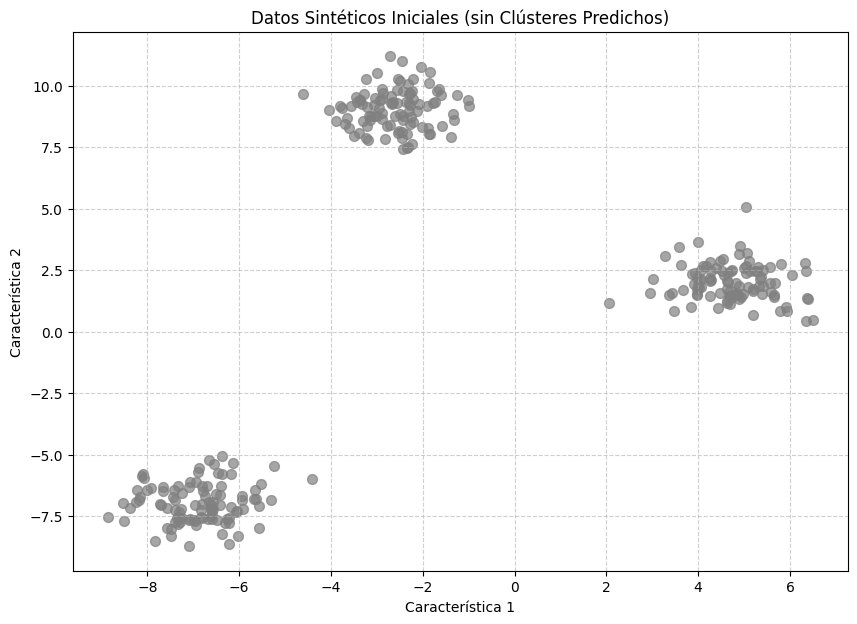

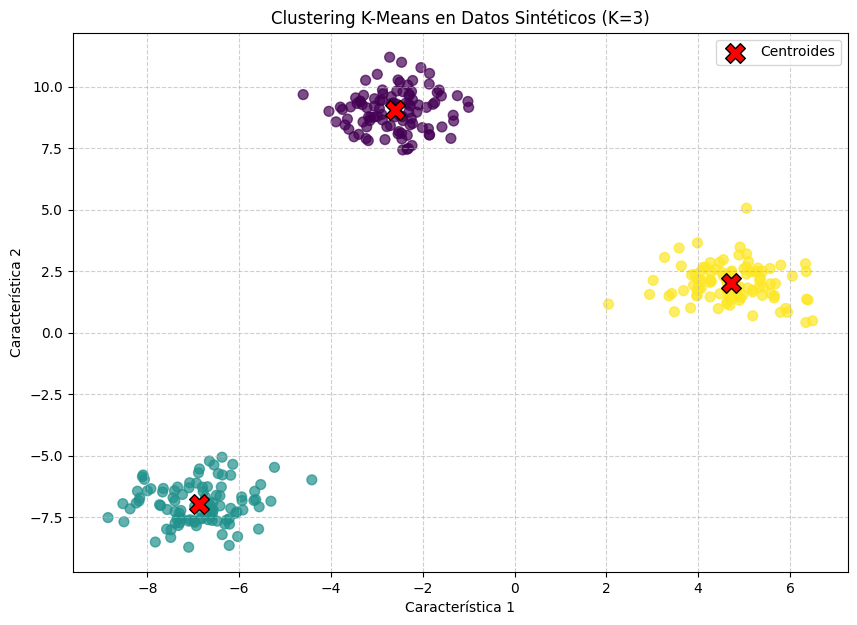

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs # Para generar datos sintéticos
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.datasets import load_iris # Para el ejemplo de estandarización e inercia

# 1. Demostrar el funcionamiento de K-Means con un dataset sintético
print("### Ejemplo 1: K-Means Básico con Datos Sintéticos ###")
print("Generaremos un dataset simple con 3 grupos distintos para ilustrar cómo K-Means los separa.")

# Generar datos sintéticos con 3 centros
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)

plt.figure(figsize=(10, 7))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='gray', s=50, alpha=0.7)
plt.title("Datos Sintéticos Iniciales (sin Clústeres Predichos)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Aplicar K-Means con K=3
# n_init=10 ejecuta el algoritmo 10 veces con diferentes inicializaciones
# y devuelve el mejor resultado en términos de inercia.
kmeans_simple = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_simple.fit(X_blobs)
labels_simple = kmeans_simple.labels_
centroids_simple = kmeans_simple.cluster_centers_

plt.figure(figsize=(10, 7))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_simple, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids_simple[:, 0], centroids_simple[:, 1], marker='X', s=200, c='red', edgecolor='black', label='Centroides')
plt.title("Clustering K-Means en Datos Sintéticos (K=3)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Interpretación del Primer Gráfico

El primer gráfico muestra los datos sintéticos antes de aplicar K-Means. Son solo un conjunto de puntos que, visualmente, podemos intuir que forman grupos.

El segundo gráfico muestra los resultados de aplicar K-Means con $K=3$. Podemos observar que:
* Los puntos se han coloreado según el clúster al que fueron asignados por el algoritmo.
* Los marcadores `X` rojos representan los **centroides** finales de cada clúster.
* El algoritmo ha logrado identificar y separar correctamente los tres grupos que generamos, confirmando que K-Means es efectivo para encontrar estructuras de clústeres esféricos.

### Importancia de la Estandarización de Características en K-Means

K-Means es un algoritmo basado en **distancias**. Esto significa que si las características de tus datos tienen escalas muy diferentes, aquellas con valores de mayor magnitud pueden dominar el cálculo de la distancia y, por lo tanto, influir desproporcionadamente en la formación de los clústeres.

**Ejemplo:** Imagina que tienes una característica "Ingresos" (en miles de dólares) y otra "Número de Hijos". Los ingresos pueden variar de 20 a 200, mientras que el número de hijos varía de 0 a 5. La distancia calculada entre dos puntos estará mayormente influenciada por la diferencia en ingresos, minimizando el impacto de la diferencia en el número de hijos.

Para evitar esto, es **crucial estandarizar o normalizar las características** antes de aplicar K-Means. La estandarización (`StandardScaler` en Scikit-learn) transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esto asegura que todas las características contribuyan equitativamente al cálculo de la distancia.

Vamos a demostrar esto usando el dataset Iris nuevamente, que tiene características con diferentes rangos.

#### Pasos en el código:
1.  **Carga de Datos:** Usamos el dataset Iris.
2.  **K-Means SIN Estandarización:** Aplicamos K-Means directamente a los datos originales.
3.  **K-Means CON Estandarización:** Usamos un `Pipeline` para primero estandarizar los datos y luego aplicar K-Means. Un `Pipeline` es muy útil para encadenar operaciones de preprocesamiento y modelado.
4.  **Visualización Comparativa:** Proyectamos los resultados en 2D (usando PCA para la visualización) para comparar el efecto de la estandarización.


### Ejemplo 2: Importancia de la Estandarización de Características en K-Means ###
K-Means es sensible a la escala de las características. Demostraremos esto con el dataset Iris.

Rangos de las características del dataset Iris (originales):
  sepal length (cm): Min=4.30, Max=7.90
  sepal width (cm): Min=2.00, Max=4.40
  petal length (cm): Min=1.00, Max=6.90
  petal width (cm): Min=0.10, Max=2.50


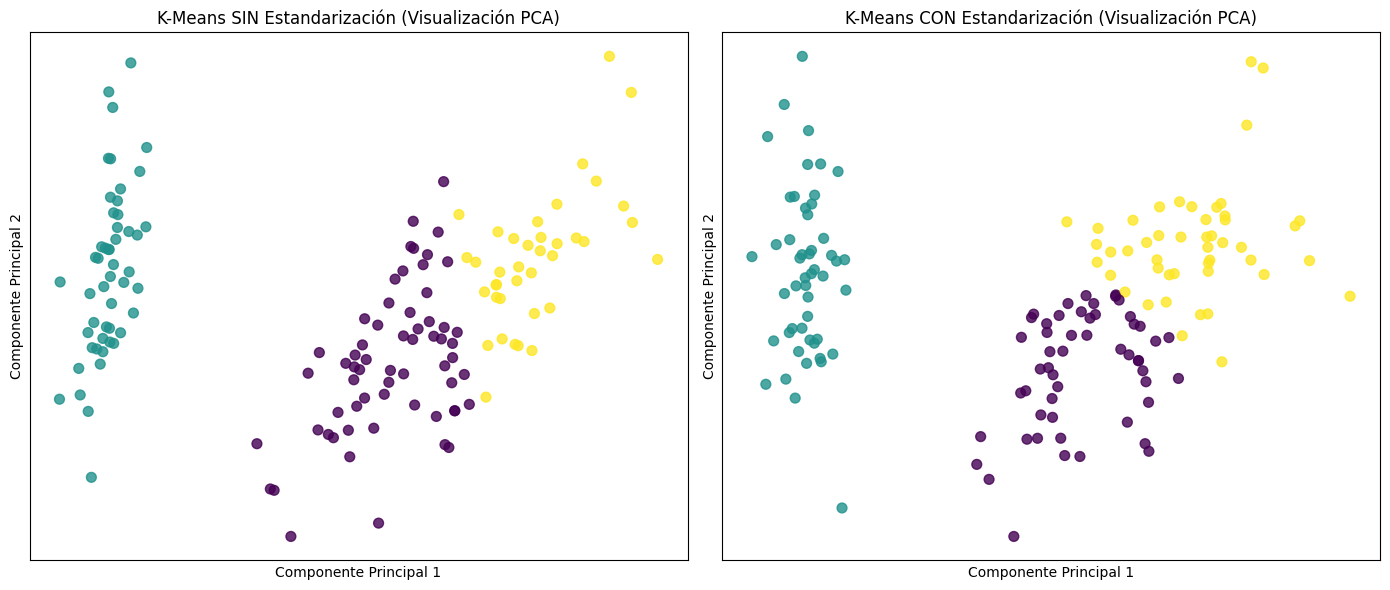

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("\n### Ejemplo 2: Importancia de la Estandarización de Características en K-Means ###")
print("K-Means es sensible a la escala de las características. Demostraremos esto con el dataset Iris.")

iris = load_iris()
X_iris = iris.data
y_iris = iris.target # Usamos las etiquetas verdaderas solo para la visualización comparativa final

# Mostrar rangos de algunas características de Iris
print("\nRangos de las características del dataset Iris (originales):")
for i, name in enumerate(iris.feature_names):
    print(f"  {name}: Min={X_iris[:, i].min():.2f}, Max={X_iris[:, i].max():.2f}")

# K-Means SIN estandarización
kmeans_no_scale = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_no_scale = kmeans_no_scale.fit_predict(X_iris)

# K-Means CON estandarización usando Pipeline
pipeline_kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=42, n_init=10))
labels_scaled = pipeline_kmeans.fit_predict(X_iris)

# Visualización para comparar (usamos PCA para reducir a 2D solo para la visualización)
# PCA en datos NO escalados para el panel izquierdo
pca_viz_no_scale = PCA(n_components=2)
X_iris_pca_no_scale = pca_viz_no_scale.fit_transform(X_iris)

# PCA en datos escalados para el panel derecho
pca_viz_scaled = PCA(n_components=2)
X_iris_scaled_for_pca = StandardScaler().fit_transform(X_iris)
X_iris_pca_scaled = pca_viz_scaled.fit_transform(X_iris_scaled_for_pca)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_iris_pca_no_scale[:, 0], X_iris_pca_no_scale[:, 1], c=labels_no_scale, cmap='viridis', s=50, alpha=0.8)
plt.title("K-Means SIN Estandarización (Visualización PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.scatter(X_iris_pca_scaled[:, 0], X_iris_pca_scaled[:, 1], c=labels_scaled, cmap='viridis', s=50, alpha=0.8)
plt.title("K-Means CON Estandarización (Visualización PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

### Interpretación de la Estandarización

* **Gráfico Izquierdo (SIN Estandarización):** Puedes notar que los clústeres pueden estar menos definidos o incluso mezclados. Esto se debe a que la característica con mayor rango (`sepal length` en Iris tiene un rango más amplio que `petal width`, por ejemplo) tiene una influencia desproporcionada en las distancias euclidianas. El algoritmo es "engañado" por las magnitudes.
* **Gráfico Derecho (CON Estandarización):** Aquí, los clústeres están mucho mejor definidos y separados. Al estandarizar, todas las características tienen una escala similar, y cada una contribuye equitativamente al cálculo de la distancia, permitiendo que K-Means encuentre agrupaciones más significativas.

Esto recalca la importancia de la estandarización como un paso de preprocesamiento esencial para algoritmos basados en distancias como K-Means.

### Determinando el Número Óptimo de Clústeres: El Método del Codo

Uno de los principales desafíos al usar K-Means es cómo elegir el valor de `K` (el número de clústeres). Si elegimos un `K` demasiado pequeño, los clústeres serán demasiado grandes y mezclados; si elegimos un `K` demasiado grande, podríamos estar dividiendo grupos naturales o simplemente capturando ruido.

El **método del codo** (Elbow Method) es una técnica heurística comúnmente utilizada para abordar este problema. Se basa en la **inercia** del modelo.

* **Inercia:** La inercia de un modelo K-Means se define como la suma de los cuadrados de las distancias de cada punto a su centroide más cercano. Un valor de inercia bajo indica que los puntos están muy cerca de sus respectivos centroides, lo que sugiere clústeres más compactos y bien definidos.

**Pasos del Método del Codo:**
1.  **Ejecutar K-Means para un rango de `K`:** Entrenamos el modelo K-Means para varios valores de `K` (por ejemplo, de 1 a 10).
2.  **Calcular la Inercia:** Para cada valor de `K`, registramos la inercia del modelo.
3.  **Graficar:** Trazamos la inercia en el eje Y contra el número de clústeres (`K`) en el eje X.
4.  **Buscar el "Codo":** Observamos el gráfico y buscamos un punto de "inflexión" o "codo" donde la disminución de la inercia comienza a ser menos pronunciada. Este "codo" sugiere un número óptimo de clústeres, ya que añadir más clústeres después de este punto no reduce significativamente la inercia, indicando que el beneficio marginal de añadir un clúster adicional disminuye drásticamente.

Vamos a aplicar el método del codo al dataset Iris escalado.

#### Pasos en el código:
1.  **Iterar K:** Ejecutamos K-Means para un rango de valores de `K`.
2.  **Almacenar Inercias:** Guardamos la inercia de cada modelo.
3.  **Graficar Inercias:** Trazamos la inercia vs. `K` para identificar el "codo".


### Determinando el Número Óptimo de Clústeres: El Método del Codo ###
Utilizaremos la inercia para encontrar el 'K' óptimo para el dataset Iris.


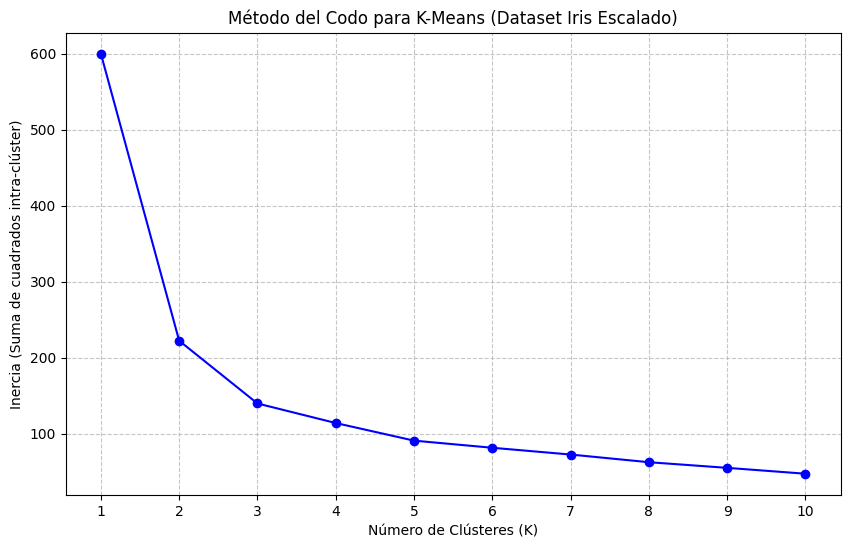

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print("\n### Determinando el Número Óptimo de Clústeres: El Método del Codo ###")
print("Utilizaremos la inercia para encontrar el 'K' óptimo para el dataset Iris.")

iris = load_iris()
X_iris = iris.data

# Asegurarse de usar datos escalados para el método del codo
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

inertias = []
k_range = range(1, 11) # Probaremos K desde 1 hasta 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init=10 para robustez
    kmeans.fit(X_iris_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linestyle='-', color='blue')
plt.title("Método del Codo para K-Means (Dataset Iris Escalado)")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Inercia (Suma de cuadrados intra-clúster)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_range)
plt.show()

In [ ]:
### Interpretación del Método del Codo

En el gráfico de la inercia vs. `K`:
* A medida que `K` aumenta, la inercia siempre disminuye, ya que los puntos están más cerca de sus centroides cuando hay más clústeres.
* Sin embargo, observamos una disminución pronunciada al principio, seguida de una disminución más gradual. El punto donde esta "curva" se suaviza o forma un "codo" es el valor sugerido para `K`. Para el dataset Iris, este codo a menudo se observa en **`K=3`**, lo cual tiene sentido ya que sabemos que el dataset tiene 3 especies reales.

### Evaluación de K-Means (Si se conocen las Etiquetas Verdaderas)

Aunque K-Means es un algoritmo no supervisado (no usa las etiquetas durante el entrenamiento), si por casualidad tenemos las etiquetas verdaderas de nuestros datos (como en el dataset Iris), podemos usarlas *después* del clustering para evaluar qué tan bien se alinean los clústeres encontrados con las clases reales.

Es importante recordar que K-Means asigna etiquetas de clúster arbitrarias (ej., 0, 1, 2...). Estas etiquetas no necesariamente coinciden con los IDs de las clases reales. Por ejemplo, el clúster `0` de K-Means podría corresponder a la clase real `1`, el clúster `1` a la clase real `0`, etc. Por lo tanto, para una matriz de confusión significativa, idealmente necesitaríamos mapear los IDs de los clústeres a los IDs de las clases reales.

En esta demostración, mostraremos una matriz de confusión directa, pero con la advertencia de que los IDs de los clústeres no son directamente los IDs de las clases.

#### Pasos en el código:
1.  **Entrenar K-Means Final:** Entrenamos K-Means con el `K` óptimo (en este caso, `K=3`).
2.  **Generar Matriz de Confusión:** Comparamos las etiquetas predichas por K-Means con las etiquetas reales usando `confusion_matrix`.
3.  **Visualizar Matriz de Confusión:** Usamos `ConfusionMatrixDisplay` para mostrarla.


### Evaluación de K-Means (si se conocen las etiquetas verdaderas) ###
Aunque K-Means es no supervisado, si tenemos etiquetas, podemos ver la correspondencia.

Tabla de Contingencia (Filas: Etiquetas Reales, Columnas: Etiquetas de Clúster K-Means):
Etiquetas de Clúster   0   1   2
Etiquetas Reales                
0                      0  50   0
1                     39   0  11
2                     14   0  36


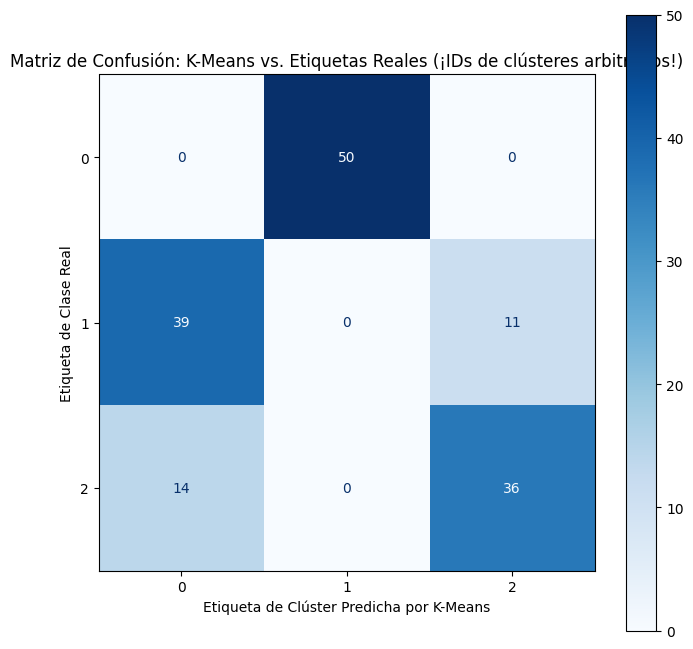

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

print("\n### Evaluación de K-Means (si se conocen las etiquetas verdaderas) ###")
print("Aunque K-Means es no supervisado, si tenemos etiquetas, podemos ver la correspondencia.")

iris = load_iris()
X_iris = iris.data
y_iris = iris.target # Etiquetas verdaderas

# Escalar los datos
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Entrenar K-Means con K=3 (asumido como óptimo por el método del codo)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_iris_scaled)

# Generar la matriz de confusión
# Nota: Los IDs de los clusters (0, 1, 2) no necesariamente corresponden directamente
# a los IDs de las clases reales (0, 1, 2). La matriz muestra las asignaciones crudas.
cm = confusion_matrix(y_iris, labels_final)

# Imprimir la tabla de contingencia para entender el mapeo implícito
print("\nTabla de Contingencia (Filas: Etiquetas Reales, Columnas: Etiquetas de Clúster K-Means):")
print(pd.crosstab(y_iris, labels_final, rownames=['Etiquetas Reales'], colnames=['Etiquetas de Clúster']))


# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Matriz de Confusión: K-Means vs. Etiquetas Reales (¡IDs de clústeres arbitrarios!)")
plt.xlabel("Etiqueta de Clúster Predicha por K-Means")
plt.ylabel("Etiqueta de Clase Real")
plt.show()

### Nota sobre la Matriz de Confusión para K-Means

En la tabla de contingencia y la matriz de confusión:
* Las filas representan las **clases reales** (0: setosa, 1: versicolor, 2: virginica).
* Las columnas representan las **etiquetas de clúster** asignadas por K-Means (0, 1, 2).

Como se mencionó, K-Means asigna etiquetas arbitrarias. Por ejemplo, el clúster "0" de K-Means podría haber capturado mayormente instancias de la clase real "1" (versicolor). La matriz nos permite ver cómo los puntos de cada clase real se distribuyeron entre los clústeres. Idealmente, queremos que la mayoría de los puntos de una clase real terminen en un *único* clúster predicho.

Para una evaluación más formal de la calidad del clustering cuando se conocen las etiquetas verdaderas, se utilizan métricas como el **Adjusted Rand Index (ARI)** o la **Mutual Information (MI)**, que no se ven afectadas por la permutación de las etiquetas de los clústeres. Si no se conocen las etiquetas verdaderas (que es lo normal en aprendizaje no supervisado), métricas como el **Coeficiente de Silueta** son más apropiadas.

### Conclusión de K-Means

K-Means es un algoritmo de clustering simple, eficiente y muy utilizado.
* **Ventajas:** Es fácil de entender, relativamente rápido y funciona bien cuando los clústeres son compactos y esféricos.
* **Limitaciones:** Requiere que especifiquemos el número de clústeres (`K`) de antemano. Es sensible a la inicialización de los centroides (aunque `n_init` en Scikit-learn ayuda a mitigar esto). También puede tener dificultades con clústeres de formas no esféricas, de diferentes tamaños o con densidades variables, y es sensible a los outliers.

A pesar de sus limitaciones, K-Means es un excelente punto de partida para el análisis exploratorio de datos no etiquetados y para tareas de segmentación en diversas industrias.